importing Jupyter notebook from Q_task_research.ipynb


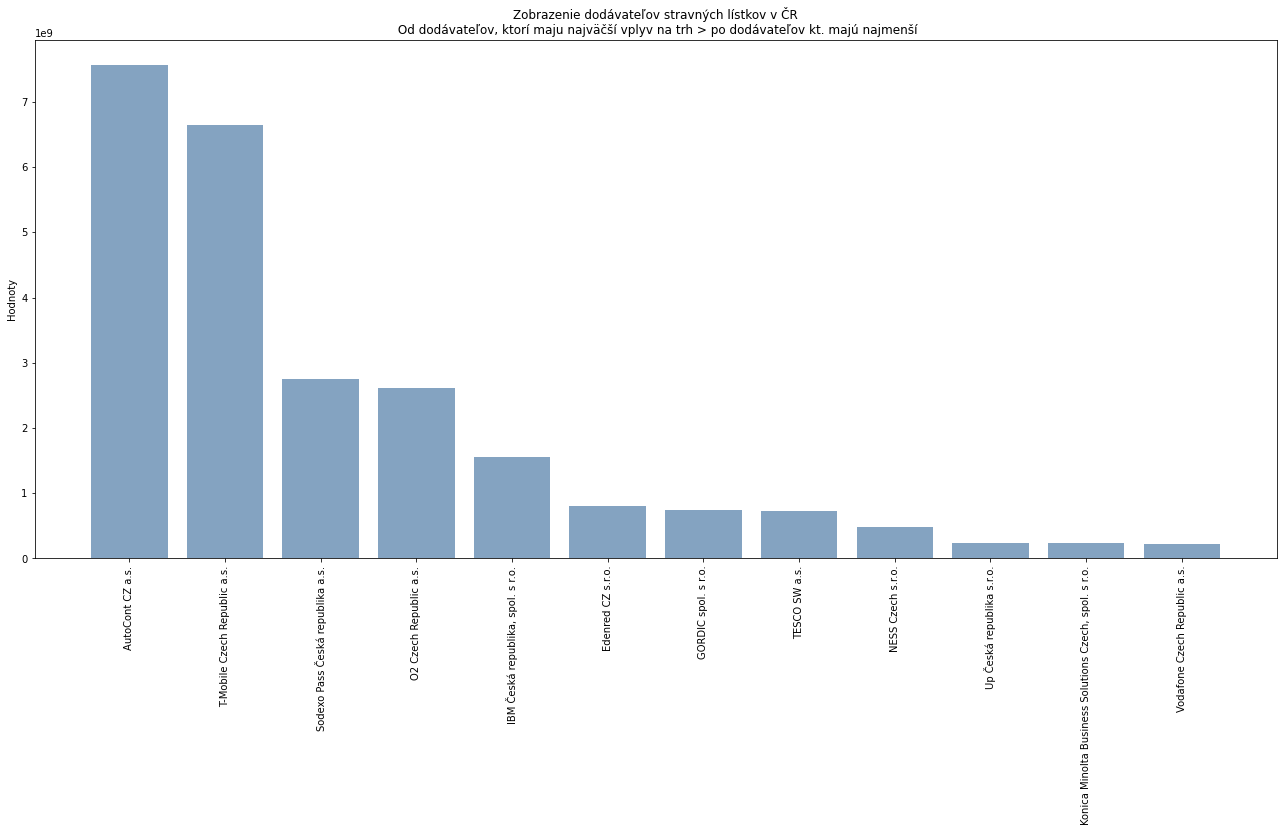

In [1]:
import import_ipynb
from Q_task_research import supplier,dataset1


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset1 = supplier("contracts.csv","publishers.csv")

In [3]:
# Questions

# A. Can you make a food voucher market share model for the country or selected regions? 
# How do you best compute a market share using all the information that you have in the dataset?

#Otázky som riešil mimo hlavnej triedy ako doplnok,kvôli prehľadnosti a aj kvôli tomu že som chcel rozpísať kroky ktoré som urobil.
df2 = dataset1.df2
region_name = df2.Region.drop_duplicates(keep='first').reset_index(drop=True)
region_name = region_name.to_numpy()
publisher = dataset1.df["PublisherIC"].astype(int).to_numpy()


market_share = []
publisher_contain = 0
for region_idx in range(0,len(region_name)):
    actual_publisher = df2.loc[df2['Region'] == region_name[region_idx]].PublisherIC.to_numpy()
    for idx in range(0,len(publisher)):
        for i in range(0, len(actual_publisher)):
            if publisher[idx] == actual_publisher[i]:
                publisher_contain += 1
        if idx == len(publisher)-1:
            market_share.append(publisher_contain)

In [4]:
#pomer celk. počtu zmluv k daným regionom
print(market_share)

[4527, 4805, 5039, 5393, 5689, 6520, 6958, 7280, 7393, 7775, 8015, 8425, 9115, 9196]


 Vysvetlenie cyklu k market_share

povedzme že máme región Praha, ktorý aj naozaj máme v datasete "publishers.csv". Tento region nam bude reprezentovať premenná actual_publisher.
vnútro cyklu for i in range(0, len(actual_publisher)): funguje tak že máme publisher[idx] ktorý reprezentuje PublisherIC z doc. contracts, čiže ak máme
hodnotu 70844844, kt je prvou hodnotou (dataset1.df) tak chceme zistiť či pre tento PublisherIC platí že spadá do regionu Praha. Cyklus obsahuje 
publisher_contain kt. som vytvoril ako počítadlo koľko krát sa dané PublisherIC (70844844) nachádza v regione Praha.

Cyklus for idx in range(0,len(publisher)): nam zabezpečuje len to že tuto operáciu potrebujeme spraviť n-počet krát (9196) podľa 
dataset1.df["PublisherIC"].shape čiže toľko krát koľko máme "zmlúv" v doc. "ontracts.csv" a taktiež to že počet nájdených zhôd ktoré prislúchajú
danému regiónu (očisl. podľa indexov) sa zapíše do poľa market_share

Cyklus for region_idx in range(0,len(region_name)): nám zabezpečuje zmenu regionov, kedže máme celkovo 14regionov tak postupne meníme a doplname pole
market_share ktoré na konci obsahuje celk. počet zmlúv ku každému regiónu.
actual_publisher = df2.loc[df2['Region'] == region_name[region_idx]].PublisherIC.to_numpy() - nam slúži ako variab. premenná na regióny / select

v podstate ide o to že sledujem zmluvy kt. prislúchajú k jednotlivým regiónom a v závere ich zapisujem do listu. Celkové zhodnotenie zmlúv podľa kraja teda vyplýva len z ich celk. počtu, nie podľa ich sumy vrátane DPH.

In [5]:
# How do you best compute a market share using all the information that you have in the dataset?
market_share_percentage = []
sum_all_shares = 0

for i in range(0,len(market_share)):
    sum_all_shares += market_share[0]
print("Suma celkového podielu" + " " + "{} ".format(sum_all_shares))
print("\n")

for i in range(0,len(market_share)):
    market_share_percentage.append((market_share[i] * 100) / sum_all_shares)

## trhový podiel u jednotlivých regionov som vypočítal tak že som si najprv vypočítal Sumu celkového podielu všetkých regionov
## a následne prepočítal perct. pomer pre každý region ako (Celkový počet zmlúv na region * 100) / Suma celkového podielu
print("Celk percentualny podiel na špec. region. podľa indexu")    
print(market_share_percentage)

Suma celkového podielu 63378 


Celk percentualny podiel na špec. region. podľa indexu
[7.142857142857143, 7.58149515604784, 7.95070844772634, 8.50926188898356, 8.976300924611063, 10.287481460443686, 10.978573006406009, 11.486635741108902, 11.664931048628862, 12.267663858121114, 12.64634415727855, 13.293256335005838, 14.381962195083467, 14.509766796049103]


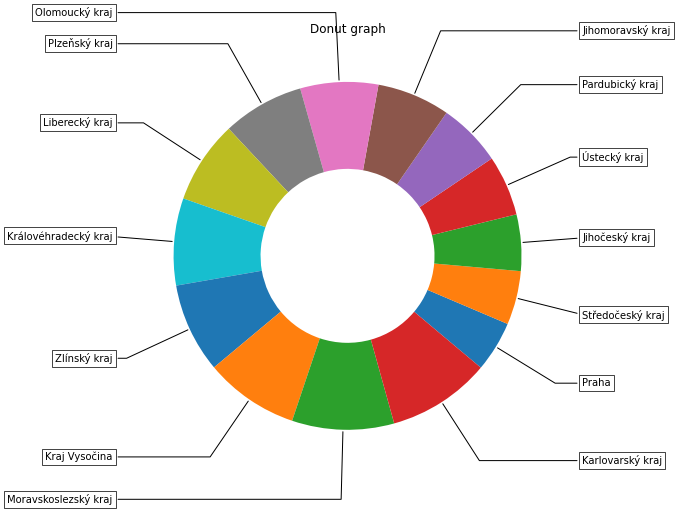

In [6]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
wedges, texts = ax.pie(market_share_percentage, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(region_name[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

ax.set_title("Donut graph")
plt.show()

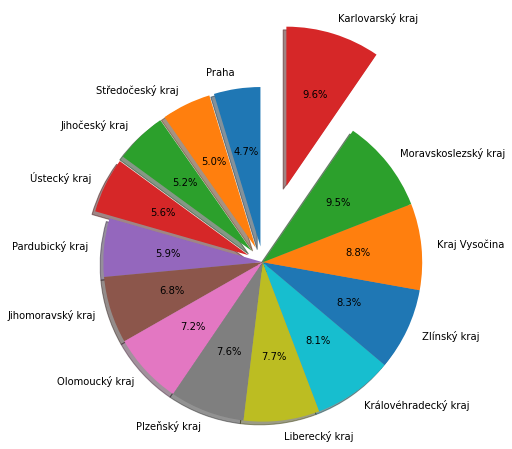

In [7]:
explode = (0.1, 0.1, 0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5)

fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(market_share_percentage, explode=explode, labels=region_name, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [8]:
df_result = pd.DataFrame().assign(region = region_name).assign(pocet_mluv = market_share).assign(Zastupenie_Vramci_CR = market_share_percentage)
df_result.sort_values(by=["Zastupenie_Vramci_CR"],ascending=False)

,region,pocet_mluv,Zastupenie_Vramci_CR
13,Karlovarský kraj,9196,14.509767
12,Moravskoslezský kraj,9115,14.381962
11,Kraj Vysočina,8425,13.293256
10,Zlínský kraj,8015,12.646344
9,Královéhradecký kraj,7775,12.267664
8,Liberecký kraj,7393,11.664931
7,Plzeňský kraj,7280,11.486636
6,Olomoucký kraj,6958,10.978573
5,Jihomoravský kraj,6520,10.287481
4,Pardubický kraj,5689,8.976301
